# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

print('Setup Completed')


Setup Completed


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
data = pd.read_csv('data/data_labeled.csv')
data.sample(5)

,Date,Latitude,Longitude,Depth,Magnitude,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Status_Reviewed,Cluster
10075,1990-11-25,-31.0100,-178.992,-0.056397,-0.687580,0,0,0,0,0,0,0,0,0,1,1
12202,1995-04-08,-15.3510,-173.359,-0.056397,-0.952011,0,0,0,0,1,0,0,0,0,1,1
22357,2015-02-22,18.6766,-106.848,-1.713861,0.806130,0,0,0,0,0,0,0,0,1,1,4
15538,2002-02-18,-3.7670,151.418,-1.134680,-0.952011,0,0,0,0,0,0,1,0,0,1,0
7598,1985-10-21,-13.5980,166.002,-0.059212,-0.952011,0,0,0,0,1,0,0,0,0,1,0


In [4]:
data.drop('Date',axis=1, inplace=True)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = data.drop('Cluster', axis=1)
y = data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(16254, 14), y_train=(16254,)
Test set shape: X_test=(6966, 14), y_test=(6966,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train,y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print('Model training selesai.')

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.997847   0.995321  0.995845  0.995561
1            Decision Tree (DT)  0.997416   0.994310  0.994517  0.994403
2            Random Forest (RF)  0.994401   0.987703  0.986100  0.986864
3  Support Vector Machine (SVM)  0.995119   0.991519  0.983552  0.987341
4              Naive Bayes (NB)  0.792851   0.864374  0.791942  0.748737


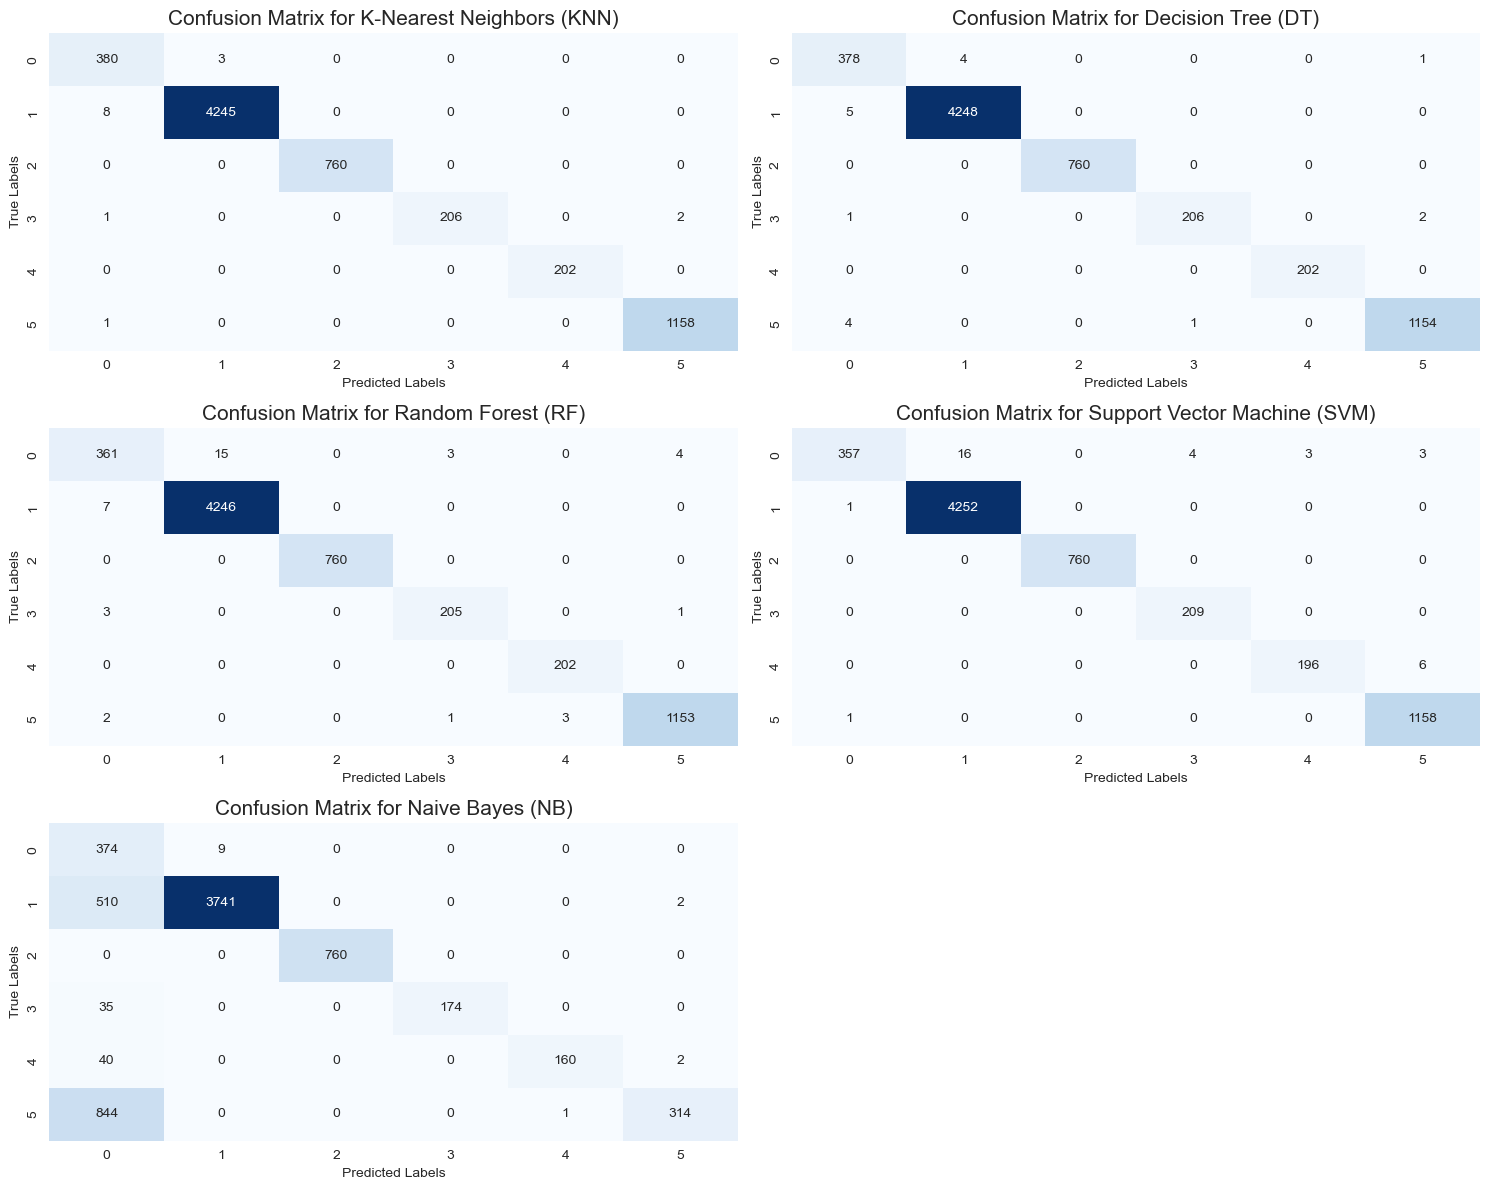

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def plot_confusion_matrix_grid(models, X_test, y_test, model_names):

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
    axes = axes.flatten()

    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    xticklabels=range(len(cm)), yticklabels=range(len(cm)), 
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {model_names[i]}', fontdict={'fontsize':15})
        axes[i].set_xlabel('Predicted Labels')
        axes[i].set_ylabel('True Labels')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() 
    plt.show()

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='macro', zero_division=0)
    }
    
    return results

models = [knn, dt, rf, svm, nb]
model_names = ['K-Nearest Neighbors (KNN)', 'Decision Tree (DT)', 'Random Forest (RF)', 'Support Vector Machine (SVM)', 'Naive Bayes (NB)']

results = {}
for model_name, model in zip(model_names, models):
    results[model_name] = evaluate_model(model, X_test, y_test)

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

plot_confusion_matrix_grid(models, X_test, y_test, model_names)

In [15]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9989
Test Accuracy: 0.9978


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Kesimpulan
1. Secara umum, keempat model (KNN, Decision Tree, Random Forest, dan SVM) menunjukkan performa yang sangat baik dengan akurasi, precision, recall, dan F1-score di atas 98%. Ini mengindikasikan bahwa model-model tersebut mampu mengklasifikasikan data gempa bumi dengan tingkat keberhasilan yang tinggi.
2. Naive Bayes (NB) memiliki performa yang paling rendah dibandingkan model lainnya, dengan akurasi hanya 79.29%, precision 86.44%, recall 79.19%, dan F1-score 74.87%. Hal ini menunjukkan bahwa Naive Bayes mungkin tidak cocok untuk dataset ini atau membutuhkan penyesuaian lebih lanjut.
3. KNN memiliki akurasi, precision, dan recall tertinggi, sehingga tampaknya menjadi model terbaik untuk dataset ini.
4. Decision Tree memiliki performa sedikit lebih rendah dari KNN, tetapi masih sangat baik.
5. Random Forest dan SVM sedikit tertinggal dalam precision dan recall dibandingkan KNN dan Decision Tree.
6. Naive Bayes, perlu dilakukan analisis lebih lanjut mengapa performanya jauh lebih rendah. Beberapa hal yang bisa dicoba:
    - Menghapus fitur yang tidak relevan atau menambahkan fitur baru yang lebih informatif
    - Menggunakan teknik smoothing untuk mengatasi masalah frekuensi nol.